# 5.4 로지스틱 회귀(Logistic Regression) 분류 모델

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Book2/Ch5/healthcare-dataset-3.csv')   
df.shape

(3915, 11)

In [ ]:
# 범주형 변수중에서 값으로 0과 1만 가지는(이미 더미 변수화 되어 있는)4개 변수명을 제외하고서 cols2에 저장

cols2 = ['gender_encoded', 'work_type_encoded', 'smoking_status_encoded']

In [ ]:
df1 = pd.get_dummies(df, columns=cols2)   # cols2에 담긴 변수들의 더미변수를 생성 
                                          # 이 명령은 더미변수를 생성한 원본변수는 제거함에 유의

In [ ]:
df1.head(3)

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,ever_married_encoded,residence_type_encoded,gender_encoded_0.0,gender_encoded_1.0,gender_encoded_2.0,work_type_encoded_0.0,work_type_encoded_1.0,work_type_encoded_2.0,work_type_encoded_3.0,smoking_status_encoded_0.0,smoking_status_encoded_1.0,smoking_status_encoded_2.0,smoking_status_encoded_3.0
0,67.0,0,1,228.69,36.6,1,1.0,1.0,0,1,0,0,0,1,0,0,1,0,0
1,80.0,0,1,105.92,32.5,1,1.0,0.0,0,1,0,0,0,1,0,0,0,1,0
2,49.0,0,0,171.23,34.4,1,1.0,1.0,1,0,0,0,0,1,0,0,0,0,1


In [ ]:
df1.shape

(3915, 19)

In [ ]:
list(df1.columns)

['age',
 'hypertension',
 'heart_disease',
 'avg_glucose_level',
 'bmi',
 'stroke',
 'ever_married_encoded',
 'residence_type_encoded',
 'gender_encoded_0.0',
 'gender_encoded_1.0',
 'gender_encoded_2.0',
 'work_type_encoded_0.0',
 'work_type_encoded_1.0',
 'work_type_encoded_2.0',
 'work_type_encoded_3.0',
 'smoking_status_encoded_0.0',
 'smoking_status_encoded_1.0',
 'smoking_status_encoded_2.0',
 'smoking_status_encoded_3.0']

In [ ]:
# 기준 더미 변수(base dummy variable)로 정한 3개 더미 변수명을 cols3에 저장
cols3 = ['gender_encoded_0.0','work_type_encoded_1.0','smoking_status_encoded_2.0']

df1.drop(cols3, axis=1, inplace=True)   # cols2에 저장된 15개 더미 변수명을 데이터프레임에서 제거
df1.shape

(3915, 16)

In [ ]:
df1.to_csv('/content/drive/MyDrive/Colab Notebooks/Book2/Ch5/healthcare-dataset-3-dummy.csv', index=False)

In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Book2/Ch5/healthcare-dataset-3-dummy.csv')
df.shape

(3915, 16)

In [ ]:
# 참조 코딩
df.dtypes

age                           float64
hypertension                    int64
heart_disease                   int64
avg_glucose_level             float64
bmi                           float64
stroke                          int64
ever_married_encoded          float64
residence_type_encoded        float64
gender_encoded_1.0              int64
gender_encoded_2.0              int64
work_type_encoded_0.0           int64
work_type_encoded_2.0           int64
work_type_encoded_3.0           int64
smoking_status_encoded_0.0      int64
smoking_status_encoded_1.0      int64
smoking_status_encoded_3.0      int64
dtype: object

In [ ]:
# 참조 코딩
# dtype을 category로 지정해 줄 변수들을 cols에 임시 저장
cols = ['hypertension', 'heart_disease', 'stroke', 'ever_married_encoded', 'residence_type_encoded',\
        'gender_encoded_1.0', 'gender_encoded_2.0',\
        'work_type_encoded_0.0', 'work_type_encoded_2.0', 'work_type_encoded_3.0',\
        'smoking_status_encoded_0.0', 'smoking_status_encoded_1.0', 'smoking_status_encoded_3.0']

df[cols] = df[cols].astype('category')   # cols에 저장된 변수들의 dtype을 category로 변경

In [ ]:
# 참조 코딩
df.dtypes

age                            float64
hypertension                  category
heart_disease                 category
avg_glucose_level              float64
bmi                            float64
stroke                        category
ever_married_encoded          category
residence_type_encoded        category
gender_encoded_1.0            category
gender_encoded_2.0            category
work_type_encoded_0.0         category
work_type_encoded_2.0         category
work_type_encoded_3.0         category
smoking_status_encoded_0.0    category
smoking_status_encoded_1.0    category
smoking_status_encoded_3.0    category
dtype: object

In [ ]:
data = df.drop(['stroke'], axis=1)   # 타겟변수를 제외한 변수만 data에 저장
target = df['stroke']                # 타겟변수만 target에 저장

from imblearn.under_sampling import RandomUnderSampler    # RandomUnderSampler를 import
undersample = RandomUnderSampler(sampling_strategy=0.333, random_state=2) 
                                                          # 타겟변수의 소수 클래스 및 다수 클래스를
                                                          # 1:3의 비율(=1/3)로 언더샘플링
data_under, target_under = undersample.fit_resample(data, target)
                                                          # data 및 target에 언더샘플링 적용

In [ ]:
# 50:50 데이터 분할
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( 
    data_under, target_under, test_size=0.5, random_state=42, stratify=target_under)

print("X_train shape:", X_train.shape) 
print("X_test shape:", X_test.shape) 

X_train shape: (386, 15)
X_test shape: (386, 15)


In [ ]:
# Logistic Regression 모형 (Default 모델)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lr = LogisticRegression(solver='lbfgs',penalty='none',random_state=0,n_jobs=-1)
model = lr.fit(X_train, y_train)
pred = model.predict(X_test)

print ("Logreg Training set score:{:.5f}".format(model.score(X_train, y_train))) 
print ("Logreg Test set score:{:.5f}".format(accuracy_score(y_test, pred)))

Logreg Training set score:0.79534
Logreg Test set score:0.75907


In [ ]:
# Logistic Regression 모형 (Default 모델)
lr = LogisticRegression(solver='lbfgs',penalty='none',random_state=0,n_jobs=-1)

# 그리드 서치
from sklearn.model_selection import GridSearchCV
params = {'solver':['lbfgs', 'saga'], 'penalty':['none']}

grid_lr = GridSearchCV(lr, param_grid=params, scoring='accuracy', cv=5, n_jobs=-1,)
grid_lr.fit(X_train, y_train)

print("GridSearchCV max accuracy:{:.5f}".format(grid_lr.best_score_))
print("GridSearchCV best parameter:", (grid_lr.best_params_)) 

GridSearchCV max accuracy:0.76697
GridSearchCV best parameter: {'penalty': 'none', 'solver': 'lbfgs'}


In [ ]:
best_clf = grid_lr.best_estimator_
pred = best_clf.predict(X_test)
print("Accuracy on test set:{:.5f}".format(accuracy_score(y_test, pred)))

Accuracy on test set:0.75907


In [ ]:
# 참조 코딩
print('절편', np.round(best_clf.intercept_, 3))
print('회귀계수', np.round(best_clf.coef_, 3))

절편 [-5.063]
회귀계수 [[ 0.087  0.137  0.108  0.006  0.003 -0.173  0.146 -0.469  0.    -1.61
  -1.638 -1.815 -0.011 -0.36  -0.22 ]]


In [ ]:
# 변수명을 Index로 만들고 coefficient값을 매칭한 데이터프레임 만들기 

feature_names = list(data.columns)   # 변수명(컬럼명)을 리스트 형태로 만들기
dft = pd.DataFrame(np.round(best_clf.coef_, 3).transpose(), index=feature_names,
                   columns=['coef'])
dft1 = dft.sort_values(by='coef', ascending=True)   # 컬럼 coef의 값들을 오름차순으로 정리
dft1                                            

,coef
work_type_encoded_3.0,-1.815
work_type_encoded_2.0,-1.638
work_type_encoded_0.0,-1.610
gender_encoded_1.0,-0.469
smoking_status_encoded_1.0,-0.360
smoking_status_encoded_3.0,-0.220
ever_married_encoded,-0.173
smoking_status_encoded_0.0,-0.011
gender_encoded_2.0,0.000
bmi,0.003


In [ ]:
# 변수명을 Index로 만들고 coefficient값을 제곱한 Odds ratio값을 Index에 매칭한 데이터프레임 만들기 

feature_names = list(data.columns)   # 변수명(컬럼명)을 리스트 형태로 만들기
dft = pd.DataFrame(np.round(np.exp(best_clf.coef_),3).transpose(), index=feature_names,
                   columns=['Odds_ratio'])
dft1 = dft.sort_values(by='Odds_ratio', ascending=False)   # 컬럼 coef의 값들을 내림차순으로 정리
dft1                                           

,Odds_ratio
residence_type_encoded,1.157
hypertension,1.146
heart_disease,1.114
age,1.091
avg_glucose_level,1.006
bmi,1.003
gender_encoded_2.0,1.000
smoking_status_encoded_0.0,0.989
ever_married_encoded,0.841
smoking_status_encoded_3.0,0.803


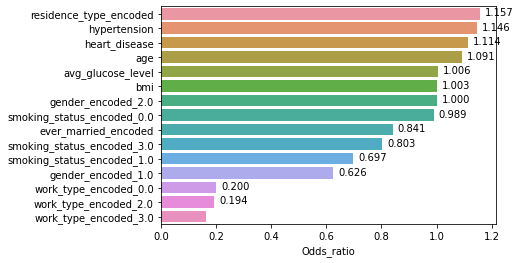

In [ ]:
# 데이터프레임 dft1의 막대그래프(barplot) 그리기
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ax = sns.barplot(y=dft1.index, x="Odds_ratio", data=dft1)

for p in ax.patches:
    ax.annotate("%.3f" % p.get_width(), (p.get_x() + p.get_width(), p.get_y()+1.2),
                xytext=(5, 10), textcoords='offset points')

# StandardScaler( )로 표준화한 데이터셋 생성 및 저장

In [ ]:
# 구간 변수들만 별도로 모아 데이터프레임 df_num을 만든다. 
numeric_cols = ['age','avg_glucose_level','bmi']
df_num = df[numeric_cols]

# StandardScaler( )로 데이터 스케일 표준화를 실행하고 결과를 데이터프레임으로 만든다.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_num_standard = pd.DataFrame(scaler.fit_transform(df_num))

# StandardScaler( )는 변수명을 지우므로, 새로 만든 데이터프레임에 다시 변수명을 넣는다.
df_num_standard.columns = df_num.columns
df_num_standard.head()

,age,avg_glucose_level,bmi
0,0.969492,2.887925,0.904522
1,1.714023,0.029109,0.312804
2,-0.061397,1.549914,0.587015
3,1.656752,1.617210,-0.913930
4,1.771295,1.898738,-0.192322


In [ ]:
df_cat = df.drop(numeric_cols, axis=1) # 원래 데이터프레임 df에서 구간변수들을 제거하여 df_cat에 저장

In [ ]:
# 구간변수 스케일을 표준화한 df_num_standard와 범주형 변수만 담은 df_cat을 병합
dfu_standard = pd.concat([df_num_standard, df_cat], axis=1)
dfu_standard.columns   # dfu의 변수명을 나열

Index(['age', 'avg_glucose_level', 'bmi', 'hypertension', 'heart_disease',
       'stroke', 'ever_married_encoded', 'residence_type_encoded',
       'gender_encoded_1.0', 'gender_encoded_2.0', 'work_type_encoded_0.0',
       'work_type_encoded_2.0', 'work_type_encoded_3.0',
       'smoking_status_encoded_0.0', 'smoking_status_encoded_1.0',
       'smoking_status_encoded_3.0'],
      dtype='object')

In [ ]:
dfu_standard.to_csv('/content/drive/MyDrive/Colab Notebooks/Book2/Ch5/stroke-standard.csv', index=False)  # 병합한 데이터프레임을 csv 형태로 저장

# 표준화한 데이터셋으로 로지스틱 회귀 재시행

In [ ]:
data = dfu_standard.drop(['stroke'], axis=1)   # 타겟변수를 제외한 변수만 data에 저장
target = dfu_standard['stroke']                # 타겟변수만 target에 저장

from imblearn.under_sampling import RandomUnderSampler    # RandomUnderSampler를 import
undersample = RandomUnderSampler(sampling_strategy=0.333, random_state=2) 
                                                          # 타겟변수의 소수 클래스 및 다수 클래스를
                                                          # 1:3의 비율(=1/3)로 언더샘플링
data_under, target_under = undersample.fit_resample(data, target)
                                                          # data 및 target에 언더샘플링 적용

In [ ]:
# 50:50 데이터 분할
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( 
    data_under, target_under, test_size=0.5, random_state=42, stratify=target_under)

print("X_train shape:", X_train.shape) 
print("X_test shape:", X_test.shape) 

X_train shape: (386, 15)
X_test shape: (386, 15)


In [ ]:
# 추가 코딩
# Logistic Regression 모형 (Default 모델)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lr = LogisticRegression(solver='lbfgs',penalty='none',random_state=0,n_jobs=-1)
model = lr.fit(X_train, y_train)
pred = model.predict(X_test)  # 학습된 Classifier로 테스트 데이터셋 자료이용해서 타겟변수 예측값 생성

print ("Logreg Training set score:{:.5f}".format(model.score(X_train, y_train))) 
print ("Logreg Test set score:{:.5f}".format(accuracy_score(y_test, pred)))

Logreg Training set score:0.79275
Logreg Test set score:0.75389


In [ ]:
# Logistic Regression 모형 (Default 모델)
lr = LogisticRegression(solver='lbfgs',penalty='none',random_state=0,n_jobs=-1)

# 그리드 서치 실행
from sklearn.model_selection import GridSearchCV
params = {'solver':['lbfgs', 'saga'], 'penalty':['none']}

grid_lr = GridSearchCV(lr, param_grid=params, scoring='accuracy', cv=5, n_jobs=-1,)
grid_lr.fit(X_train, y_train)

print("GridSearchCV max accuracy:{:.5f}".format(grid_lr.best_score_))
print("GridSearchCV best parameter:", (grid_lr.best_params_)) 

GridSearchCV max accuracy:0.77216
GridSearchCV best parameter: {'penalty': 'none', 'solver': 'saga'}


In [ ]:
best_clf = grid_lr.best_estimator_
pred = best_clf.predict(X_test)
print("Accuracy on test set:{:.5f}".format(accuracy_score(y_test, pred)))

Accuracy on test set:0.75389
